In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [15]:
#loading the dataset
df = pd.read_csv('../data/datacar_cleaned.csv')
print(df.head())

   year  selling_price  km_driven  fuel  seller_type  transmission  owner  \
0  2014         450000     145500     1            1             1      0   
1  2014         370000     120000     1            1             1      2   
2  2006         158000     140000     3            1             1      4   
3  2010         225000     127000     1            1             1      0   
4  2007         130000     120000     3            1             1      0   

   mileage  engine  max_power  seats  
0    23.40  1248.0      74.00    5.0  
1    21.14  1498.0     103.52    5.0  
2    17.70  1497.0      78.00    5.0  
3    23.00  1396.0      90.00    5.0  
4    16.10  1298.0      88.20    5.0  


In [16]:
#Splitting the dataset into features and target variable
X = df.drop(columns=['selling_price'])
y = df['selling_price']

In [17]:
# Splitiing the dataset into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
lasso = Lasso(alpha=0.5)

In [19]:
# fitting the model
lasso.fit(X_train, y_train)

Lasso(alpha=0.5)

In [22]:
#making prediction
y_pred = lasso.predict(X_test)

In [24]:
# Ensure predictions are made on the correct test set
y_pred = lasso.predict(X_test)

# Evaluation of the metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
root_mse = np.sqrt(mse)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R2 Score: {r2}")
print(f"Root Mean Squared Error: {root_mse}")

Mean Squared Error: 205496031561.92886
Mean Absolute Error: 272396.4396164046
R2 Score: 0.6864974682922088
Root Mean Squared Error: 453316.7011725124


In [25]:
evalation = []
model = "Lasso"
evalation.append({
    'model': model, 
    'MAE': mae,
    'MSE' : mse,
    'r2score' : r2,
    'Root MSE' : root_mse
})
# Creating a DataFrame to display the evaluation metrics
ev_df = pd.DataFrame(evalation)
print(ev_df)
ev_df.to_csv('../data/evaluation.csv', mode='a', header=False, index=False)

   model            MAE           MSE   r2score       Root MSE
0  Lasso  272396.439616  2.054960e+11  0.686497  453316.701173


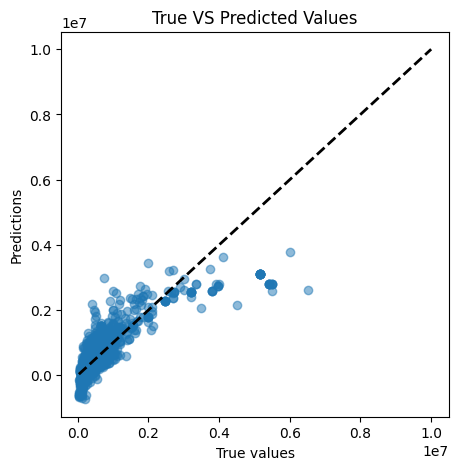

In [26]:
#Plotting the error
plt.figure(figsize=(5,5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('True values')
plt.ylabel('Predictions')
plt.title('True VS Predicted Values')
plt.show()